In [1]:
import sys
myPath = "/home/sze/Github/hostDocker/src/main/python/"
if myPath not in sys.path:
    sys.path.insert(0, myPath)

<IPython.core.display.Javascript object>


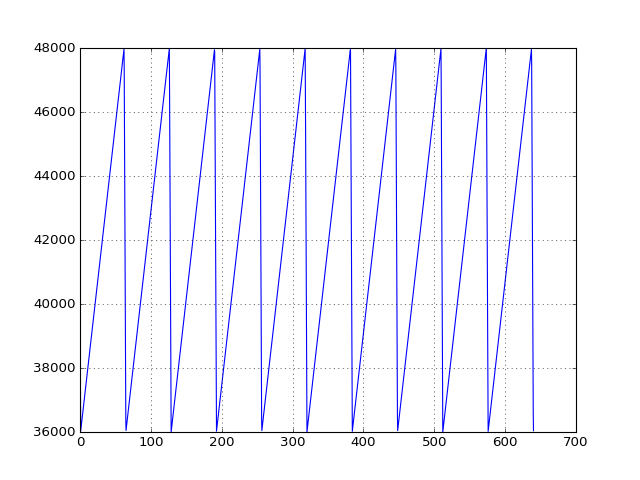

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from Host.DriverSimulator.Simulators import TunerSimulator
from Host.autogen import interface
from Host.Common.timestamp import getTimestamp

class DummyDas(object):
    def __init__(self):
        self.das_registers = interface.INTERFACE_NUMBER_OF_REGISTERS * [0]
        self.fpga_registers = 512*[0]
        self.spectrumControl = None
        
    def getDasTimestamp(self):
        return getTimestamp()


if __name__ == "__main__":
    ds = DummyDas()
    ts = TunerSimulator(ds)
    startTime = ts.timestamp
    ts.sweepRampLow = 36000
    ts.sweepRampHigh = 48000
    ts.windowRampLow = 36500
    ts.windowRampHigh = 47500
    ts.rampModeTimeout = 1000000
    ts.slopeUp = 1000
    ts.slopeDown = 25000
    ts.switchToRampMode()
    tbase = np.linspace(startTime, startTime+640, 2001)
    values = []
    slopes = []

    ts.value = 40000
    ts.slope = "down"
    
    for t in tbase:
        v, s = ts.getStateAt(t)
        values.append(v)
        slopes.append(1 if "up" else 0)
    values = np.asarray(values)
    slopes = np.asarray(slopes)
    plt.close("all")
    plt.plot(tbase - startTime, values)
    plt.grid(True)

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from Host.DriverSimulator.Simulators import TunerSimulator
from Host.autogen import interface
from Host.Common.timestamp import getTimestamp

class DummyDas(object):
    def __init__(self):
        self.das_registers = interface.INTERFACE_NUMBER_OF_REGISTERS * [0]
        self.fpga_registers = 512*[0]
        self.spectrumControl = None
        
    def getDasTimestamp(self):
        return getTimestamp()


if __name__ == "__main__":
    ds = DummyDas()
    ts = TunerSimulator(ds)
    startTime = ts.timestamp
    ts.sweepRampLow = 36000
    ts.sweepRampHigh = 48000
    ts.windowRampLow = 36500
    ts.windowRampHigh = 47500
    ts.rampModeTimeout = 1000000
    ts.slopeUp = 1000
    ts.slopeDown = 1000
    ts.switchToRampMode()
    tbase = np.linspace(startTime, startTime+640, 2001)
    values = []
    slopes = []

    ts.value = 40000
    ts.slope = "up"
    
    allowedValues = [40000]
    allowedSlopes = ["down", "up"]
    
    value, slope, when = ts.getNextAt(allowedValues, allowedSlopes, startTime + 85)
    print value, slope, when - startTime
    print ts.getStateAt(when)


40000 up 122.875
(39999.0234375, 'up')
